# Using BERT to Categorize the Text/Emails in the CSV file

In [1]:
!pip install tensorflow_text

     |████████████████████████████████| 4.9 MB 5.4 MB/s 
     |████████████████████████████████| 497.5 MB 27 kB/s 
     |████████████████████████████████| 1.4 MB 37.7 MB/s 
     |████████████████████████████████| 462 kB 46.7 MB/s 
     |████████████████████████████████| 15.7 MB 37.7 MB/s 
     |████████████████████████████████| 5.8 MB 36.9 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.7.0
    Uninstalling tensorflow-2.7.0:
      Successfully uninstalled tensorflow-2.7.0
ERROR: pip's 

In [44]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import pandas as pd
import numpy as np

## Importing the CSV file

In [4]:
df=pd.read_csv('/content/spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.groupby('Category').describe()

Message                                                               
           count unique                                                top freq
Category                                                                       
ham         4825   4516                             Sorry, I'll call later   30
spam         747    641  Please call our customer service representativ...    4

In [6]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [7]:
747/4825

0.15481865284974095

## Handling the imbalances in different categories of the dataset. 

* ~15% is about Spam Emails
* ~85% is about Ham Emails

> We will be down sampling the 'HAM' emails, so that both the emails have the same size and imbalancing of dataset is removed.

In [8]:
 df_spam=df[df['Category']=='spam']
 df_spam.shape

(747, 2)

In [9]:
 df_ham=df[df['Category']=='ham']
 df_ham.shape

(4825, 2)

In [10]:
df_ham_downsampled=df_ham.sample(df_spam.shape[0])
df_ham_downsampled.shape

(747, 2)

In [11]:
747*2

1494

In [13]:
df_balanced=pd.concat([df_spam, df_ham_downsampled])
df_balanced.shape

(1494, 2)

In [14]:
df_balanced['Category'].value_counts()

spam    747
ham     747
Name: Category, dtype: int64

In [17]:
df_balanced['spam']=df_balanced['Category'].apply(lambda x: 1 if  x == 'spam' else 0)
df_balanced.sample(10)

,Category,Message,spam
2516,ham,Bognor it is! Should be splendid at this time ...,0
4768,spam,Your unique user ID is 1172. For removal send ...,1
4965,spam,Dear Voucher holder Have your next meal on us....,1
4690,ham,"Didn't try, g and I decided not to head out",0
546,ham,Then any special there?,0
4127,spam,"SPJanuary Male Sale! Hot Gay chat now cheaper,...",1
1419,ham,Lmao. Take a pic and send it to me.,0
5052,ham,With my sis lor... We juz watched italian job.,0
2119,spam,U can WIN £100 of Music Gift Vouchers every we...,1
2374,spam,XMAS Prize draws! We are trying to contact U. ...,1


In [19]:
df_balanced['spam']

2       1
5       1
8       1
9       1
11      1
       ..
4603    0
5245    0
4361    0
5280    0
477     0
Name: spam, Length: 1494, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_balanced['Message'],df_balanced['spam'], stratify=df_balanced['spam']) # To make the distribution equal

In [22]:
X_train.head(4)

1752    * Was thinking about chuckin ur red green n bl...
4961            I want  &lt;#&gt;  rs da:)do you have it?
4894                               Send me the new number
680     Missed your call cause I was yelling at scrapp...
Name: Message, dtype: object

## Importing the BERT model

In [23]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

## Creating BERT function for sentences embedding

In [24]:
def get_sentence_embedding(sentences):
  preprocessed_text=bert_preprocess(sentences)
  return bert_encoder(preprocessed_text)['pooled_output']

get_sentence_embedding([
      "Learning BERT for sentence embedding",
      "Get a free steam game worth 100INR for signing up NOW!!!"

])

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.91002315, -0.34690621, -0.31414583, ..., -0.42889008,
        -0.64848876,  0.84623927],
       [-0.88080764, -0.5630631 , -0.89991844, ..., -0.6267056 ,
        -0.72902614,  0.84363717]], dtype=float32)>

In [26]:
e = get_sentence_embedding([
    "banana", 
    "grapes",
    "mango",
    "jeff bezos",
    "elon musk",
    "bill gates"
])

In [27]:
e

<tf.Tensor: shape=(6, 768), dtype=float32, numpy=
array([[-0.7606924 , -0.14219402,  0.49604616, ...,  0.4216532 ,
        -0.5322144 ,  0.80312175],
       [-0.86023194, -0.21242903,  0.4915702 , ...,  0.3979814 ,
        -0.60506254,  0.8447165 ],
       [-0.7128873 , -0.15463948,  0.38401625, ...,  0.35278714,
        -0.50991404,  0.7347418 ],
       [-0.825335  , -0.35550606, -0.59069705, ..., -0.01613726,
        -0.61417615,  0.872303  ],
       [-0.7504137 , -0.268126  , -0.26689777, ...,  0.02839315,
        -0.59381   ,  0.7974992 ],
       [-0.7854428 , -0.29949576,  0.4102777 , ...,  0.5222555 ,
        -0.4957344 ,  0.8150739 ]], dtype=float32)>

In [28]:
from sklearn.metrics.pairwise import cosine_similarity # To measure how similar two vectors are.

cosine_similarity([e[0]], [e[1]])

array([[0.99110895]], dtype=float32)

In [29]:
cosine_similarity([e[0]], [e[2]])

array([[0.99540985]], dtype=float32)

In [30]:
cosine_similarity([e[0]], [e[4]])

array([[0.8933629]], dtype=float32)

In [31]:
cosine_similarity([e[4]], [e[5]])

array([[0.916415]], dtype=float32)

## Using Keras Functional Model to train the model

In [36]:
# BERT Layers

text_input=tf.keras.layers.Input(shape=(),dtype=tf.string,name='text')
preprocessed_text= bert_preprocess(text_input)
outputs=bert_encoder(preprocessed_text)

# Neural Network Layers

layer_1=tf.keras.layers.Dropout(0.1,name='dropout')(outputs['pooled_output'])
layer_2=tf.keras.layers.Dense(1,activation='sigmoid', name= 'result')(layer_1)

# Model

model=tf.keras.Model(inputs=[text_input], outputs=[layer_2])

In [37]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                

In [39]:
METRICS=[
         tf.keras.metrics.BinaryAccuracy(name='accuracy'),
         tf.keras.metrics.Precision(name='precision'),
         tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=METRICS)

In [41]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
35/35 [==============================] - 44s 780ms/step - loss: 0.6761 - accuracy: 0.5973 - precision: 0.5892 - recall: 0.6429
Epoch 2/10
35/35 [==============================] - 24s 692ms/step - loss: 0.5361 - accuracy: 0.7937 - precision: 0.7737 - recall: 0.8304
Epoch 3/10
35/35 [==============================] - 25s 717ms/step - loss: 0.4625 - accuracy: 0.8482 - precision: 0.8495 - recall: 0.8464
Epoch 4/10
35/35 [==============================] - 24s 685ms/step - loss: 0.4149 - accuracy: 0.8598 - precision: 0.8456 - recall: 0.8804
Epoch 5/10
35/35 [==============================] - 26s 755ms/step - loss: 0.3765 - accuracy: 0.8750 - precision: 0.8596 - recall: 0.8964
Epoch 6/10
35/35 [==============================] - 27s 779ms/step - loss: 0.3482 - accuracy: 0.8982 - precision: 0.8780 - recall: 0.9250
Epoch 7/10
35/35 [==============================] - 28s 796ms/step - loss: 0.3262 - accuracy: 0.9018 - precision: 0.8934 - recall: 0.9125
Epoch 8/10
35/35 [================

In [42]:
model.evaluate(X_test,y_test)

12/12 [==============================] - 9s 644ms/step - loss: 0.2756 - accuracy: 0.9171 - precision: 0.9239 - recall: 0.9091


[0.27563926577568054,
 0.9171122908592224,
 0.9239130616188049,
 0.9090909361839294]

In [43]:
y_predicted=model.predict(X_test)
y_predicted=y_predicted.flatten() # Converting the 2D array to 1D array

In [45]:
y_predicted=np.where(y_predicted > 0.5, 1,0) # If it is greater than '0.5' then put '1', otherwise put '0'

In [46]:
y_predicted

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,

In [47]:
from sklearn.metrics import confusion_matrix, classification_report

cm=confusion_matrix(y_test,y_predicted)
cm

array([[173,  14],
       [ 17, 170]])

Text(33.0, 0.5, 'Truth')

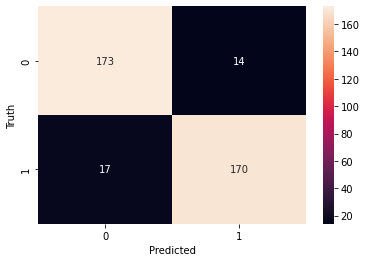

In [48]:
from matplotlib import pyplot as plt
import seaborn as sn

sn.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [49]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       187
           1       0.92      0.91      0.92       187

    accuracy                           0.92       374
   macro avg       0.92      0.92      0.92       374
weighted avg       0.92      0.92      0.92       374



## Inferences

In [51]:
reviews = [
    'Reply to win Â£100 weekly! Where will the 2006 FIFA World Cup be held? Send STOP to 87239 to end service',
    'You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p pÂ£3.99',
    'it to 80488. Your 500 free text messages are valid until 31 December 2005.',
    'Hey Sam, Are you coming for a cricket game tomorrow',
    "Why don't you wait 'til at least wednesday to see if you get your ."
]
model.predict(reviews) # SPAM -> '0.5' or greater , HAM -> Lower than '0.5'

array([[0.7313475 ],
       [0.78355527],
       [0.7189845 ],
       [0.18339433],
       [0.09809528]], dtype=float32)